## Import and clean

In [1]:
#Read the Dataset in pandas and obtain number of data and its columns
import pandas as pd
df=pd.read_csv('Survey on Public Perception of Medical Insurance in Malaysia.csv')
print(df.shape)
df.head()

(112, 17)


,Timestamp,What is your gender?,What is your race?,How old are you?,Which state do you currently reside in?,What is your job background?,Are you aware of Malaysia's insurance regulations and laws?,Are you familiar with the different medical insurance products available in the market?,What type of medical insurance policy do you currently have?,What is your preferred social media platform for receiving medical insurance-related information?,What channels do you prefer when purchasing medical insurance policies?,What factors do you consider when comparing medical insurance policies? (Select 3 most relevant factors),Which factors do you consider most important while buying a medical insurance policy? (Select 2 most relevant factors),Do you feel that insurance premiums are generally affordable?,Do you feel adequately protected by your insurance policy?,"What are your thoughts on the importance of purchasing medical insurance (such as a medical card or life insurance)? Do you think it's essential for everyone? Why, or why not?","Based on your personal experiences interacting with insurance agents or companies regarding medical insurance, please share the specific aspects of their service that you found satisfactory or unsatisfactory. This could include interactions related to claim processing, providing information on medical insurance policy, customer support, or any other relevant interactions."
0,2024/05/09 11:31:48 AM GMT+8,Female,Malay,56 +,Selangor,Housewife,Yes,No,Both,Facebook,Through insurance agents,Price;Customer Reviews;Ease of claim process,Affordability;Coverage adequacy,No,Yes,I think medical insurance is very important to...,my insurance agent has been helpful if i ask h...
1,2024/05/09 11:35:55 AM GMT+8,Male,Malay,18 - 25,Selangor,Information Technology (IT),Maybe,Yes,Both,X (formally known as Twitter),Directly from insurance company's website,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,Yes,yes medical card is essential to everyone. the...,my experience with insurance agents is mostly ...
2,2024/05/09 11:43:17 AM GMT+8,Female,Malay,26 - 35,Wilayah Persekutuan Kuala Lumpur,Healthcare/Medical,No,No,Medical Card,Instagram,Through insurance agents,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,No,Yes,i wont say medical insurance is essential but ...,i have not made any claims so far but when i h...
3,2024/05/10 10:31:38 PM GMT+8,Male,Malay,56 +,Selangor,Marketing/Advertising,Yes,Yes,Both,Facebook,Directly from insurance company's website,Price;Coverage;Policy terms and conditions,Coverage adequacy;Additional benefits and serv...,Yes,Yes,Having a medical card is essential for everyon...,The part where i am satisfied is when my insur...
4,2024/05/10 10:35:44 PM GMT+8,Male,Malay,36 - 45,Wilayah Persekutuan Kuala Lumpur,Engineering,No,Maybe,Medical Card,Facebook,Employer-provided,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,No,Everybody should get a medical card because th...,I have my company medical card and the mobile ...


In [2]:
df = df.drop('Timestamp', axis=1)

df.head(5)

,What is your gender?,What is your race?,How old are you?,Which state do you currently reside in?,What is your job background?,Are you aware of Malaysia's insurance regulations and laws?,Are you familiar with the different medical insurance products available in the market?,What type of medical insurance policy do you currently have?,What is your preferred social media platform for receiving medical insurance-related information?,What channels do you prefer when purchasing medical insurance policies?,What factors do you consider when comparing medical insurance policies? (Select 3 most relevant factors),Which factors do you consider most important while buying a medical insurance policy? (Select 2 most relevant factors),Do you feel that insurance premiums are generally affordable?,Do you feel adequately protected by your insurance policy?,"What are your thoughts on the importance of purchasing medical insurance (such as a medical card or life insurance)? Do you think it's essential for everyone? Why, or why not?","Based on your personal experiences interacting with insurance agents or companies regarding medical insurance, please share the specific aspects of their service that you found satisfactory or unsatisfactory. This could include interactions related to claim processing, providing information on medical insurance policy, customer support, or any other relevant interactions."
0,Female,Malay,56 +,Selangor,Housewife,Yes,No,Both,Facebook,Through insurance agents,Price;Customer Reviews;Ease of claim process,Affordability;Coverage adequacy,No,Yes,I think medical insurance is very important to...,my insurance agent has been helpful if i ask h...
1,Male,Malay,18 - 25,Selangor,Information Technology (IT),Maybe,Yes,Both,X (formally known as Twitter),Directly from insurance company's website,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,Yes,yes medical card is essential to everyone. the...,my experience with insurance agents is mostly ...
2,Female,Malay,26 - 35,Wilayah Persekutuan Kuala Lumpur,Healthcare/Medical,No,No,Medical Card,Instagram,Through insurance agents,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,No,Yes,i wont say medical insurance is essential but ...,i have not made any claims so far but when i h...
3,Male,Malay,56 +,Selangor,Marketing/Advertising,Yes,Yes,Both,Facebook,Directly from insurance company's website,Price;Coverage;Policy terms and conditions,Coverage adequacy;Additional benefits and serv...,Yes,Yes,Having a medical card is essential for everyon...,The part where i am satisfied is when my insur...
4,Male,Malay,36 - 45,Wilayah Persekutuan Kuala Lumpur,Engineering,No,Maybe,Medical Card,Facebook,Employer-provided,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,No,Everybody should get a medical card because th...,I have my company medical card and the mobile ...


In [3]:
import re
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters, numbers, punctuations
    text = re.sub(r"[^a-zA-Z#]", " ", text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    text_tokens = text.split()
    text = " ".join([word for word in text_tokens if word not in stop_words])

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df['clean_text'] = df['Based on your personal experiences interacting with insurance agents or companies regarding medical insurance, please share the specific aspects of their service that you found satisfactory or unsatisfactory. This could include interactions related to claim processing, providing information on medical insurance policy, customer support, or any other relevant interactions.'].apply(lambda x: clean_text(x))
df

,What is your gender?,What is your race?,How old are you?,Which state do you currently reside in?,What is your job background?,Are you aware of Malaysia's insurance regulations and laws?,Are you familiar with the different medical insurance products available in the market?,What type of medical insurance policy do you currently have?,What is your preferred social media platform for receiving medical insurance-related information?,What channels do you prefer when purchasing medical insurance policies?,What factors do you consider when comparing medical insurance policies? (Select 3 most relevant factors),Which factors do you consider most important while buying a medical insurance policy? (Select 2 most relevant factors),Do you feel that insurance premiums are generally affordable?,Do you feel adequately protected by your insurance policy?,"What are your thoughts on the importance of purchasing medical insurance (such as a medical card or life insurance)? Do you think it's essential for everyone? Why, or why not?","Based on your personal experiences interacting with insurance agents or companies regarding medical insurance, please share the specific aspects of their service that you found satisfactory or unsatisfactory. This could include interactions related to claim processing, providing information on medical insurance policy, customer support, or any other relevant interactions.",clean_text
0,Female,Malay,56 +,Selangor,Housewife,Yes,No,Both,Facebook,Through insurance agents,Price;Customer Reviews;Ease of claim process,Affordability;Coverage adequacy,No,Yes,I think medical insurance is very important to...,my insurance agent has been helpful if i ask h...,insurance agent helpful ask questions find cla...
1,Male,Malay,18 - 25,Selangor,Information Technology (IT),Maybe,Yes,Both,X (formally known as Twitter),Directly from insurance company's website,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,Yes,yes medical card is essential to everyone. the...,my experience with insurance agents is mostly ...,experience insurance agents mostly ok insuranc...
2,Female,Malay,26 - 35,Wilayah Persekutuan Kuala Lumpur,Healthcare/Medical,No,No,Medical Card,Instagram,Through insurance agents,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,No,Yes,i wont say medical insurance is essential but ...,i have not made any claims so far but when i h...,made claims far handle insurance agents family...
3,Male,Malay,56 +,Selangor,Marketing/Advertising,Yes,Yes,Both,Facebook,Directly from insurance company's website,Price;Coverage;Policy terms and conditions,Coverage adequacy;Additional benefits and serv...,Yes,Yes,Having a medical card is essential for everyon...,The part where i am satisfied is when my insur...,part satisfied insurance agent always follow c...
4,Male,Malay,36 - 45,Wilayah Persekutuan Kuala Lumpur,Engineering,No,Maybe,Medical Card,Facebook,Employer-provided,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,No,Everybody should get a medical card because th...,I have my company medical card and the mobile ...,company medical card mobile application handle...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Female,Indian,26 - 35,Selangor,Information Technology (IT),No,Yes,Medical Card,TikTok,Through insurance agents,Price;Coverage;Customer Reviews,Affordability;Additional benefits and services,No,Yes,Very important as the government hospital is o...,The insurance company did not provide any paym...,insurance company provide payment reminders re...
108,Male,Malay,26 - 35,Selangor,Information Technology (IT),No,Yes,Medical Card,TikTok,Through insurance agents,Price;Coverage;Customer Reviews,Affordability;Additional benefits and services,No,Yes,The cost of dialysis and cancer treatments is ...,The company offered discounts to change to a n...,company offered discounts change new plan sinc...
109,Male,Indian,56 +,Selangor,Engineering,No,No,NaN,Facebook,Emplo

In [5]:
import re, string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [6]:
# Text Pre-Processing
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace
    return text

# remove stop words
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

# Stemming
port = PorterStemmer()
def stemming(string):
    a=[port.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)

# Lemmatizer
wl = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [7]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

df['clean_text'] = df['clean_text'].apply(lambda x: finalpreprocess(x))
df

,What is your gender?,What is your race?,How old are you?,Which state do you currently reside in?,What is your job background?,Are you aware of Malaysia's insurance regulations and laws?,Are you familiar with the different medical insurance products available in the market?,What type of medical insurance policy do you currently have?,What is your preferred social media platform for receiving medical insurance-related information?,What channels do you prefer when purchasing medical insurance policies?,What factors do you consider when comparing medical insurance policies? (Select 3 most relevant factors),Which factors do you consider most important while buying a medical insurance policy? (Select 2 most relevant factors),Do you feel that insurance premiums are generally affordable?,Do you feel adequately protected by your insurance policy?,"What are your thoughts on the importance of purchasing medical insurance (such as a medical card or life insurance)? Do you think it's essential for everyone? Why, or why not?","Based on your personal experiences interacting with insurance agents or companies regarding medical insurance, please share the specific aspects of their service that you found satisfactory or unsatisfactory. This could include interactions related to claim processing, providing information on medical insurance policy, customer support, or any other relevant interactions.",clean_text
0,Female,Malay,56 +,Selangor,Housewife,Yes,No,Both,Facebook,Through insurance agents,Price;Customer Reviews;Ease of claim process,Affordability;Coverage adequacy,No,Yes,I think medical insurance is very important to...,my insurance agent has been helpful if i ask h...,insurance agent helpful ask question find clai...
1,Male,Malay,18 - 25,Selangor,Information Technology (IT),Maybe,Yes,Both,X (formally known as Twitter),Directly from insurance company's website,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,Yes,yes medical card is essential to everyone. the...,my experience with insurance agents is mostly ...,experience insurance agent mostly ok insurance...
2,Female,Malay,26 - 35,Wilayah Persekutuan Kuala Lumpur,Healthcare/Medical,No,No,Medical Card,Instagram,Through insurance agents,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,No,Yes,i wont say medical insurance is essential but ...,i have not made any claims so far but when i h...,make claim far handle insurance agent family g...
3,Male,Malay,56 +,Selangor,Marketing/Advertising,Yes,Yes,Both,Facebook,Directly from insurance company's website,Price;Coverage;Policy terms and conditions,Coverage adequacy;Additional benefits and serv...,Yes,Yes,Having a medical card is essential for everyon...,The part where i am satisfied is when my insur...,part satisfy insurance agent always follow con...
4,Male,Malay,36 - 45,Wilayah Persekutuan Kuala Lumpur,Engineering,No,Maybe,Medical Card,Facebook,Employer-provided,Price;Coverage;Customer Reviews,Affordability;Coverage adequacy,Not sure,No,Everybody should get a medical card because th...,I have my company medical card and the mobile ...,company medical card mobile application handle...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Female,Indian,26 - 35,Selangor,Information Technology (IT),No,Yes,Medical Card,TikTok,Through insurance agents,Price;Coverage;Customer Reviews,Affordability;Additional benefits and services,No,Yes,Very important as the government hospital is o...,The insurance company did not provide any paym...,insurance company provide payment reminder res...
108,Male,Malay,26 - 35,Selangor,Information Technology (IT),No,Yes,Medical Card,TikTok,Through insurance agents,Price;Coverage;Customer Reviews,Affordability;Additional benefits and services,No,Yes,The cost of dialysis and cancer treatments is ...,The company offered discounts to change to a n...,company offer discount change new plan since l...
109,Male,Indian,56 +,Selangor,Engineering,No,No,NaN,Facebook,Emplo

## EDA & Word Cloud

In [ ]:
df.columns

Index(['What is your gender?', 'What is your race?', 'How old are you?',
       'Which state do you currently reside in?',
       '  What is your job background?',
       'Are you aware of Malaysia's insurance regulations and laws?',
       'Are you familiar with the different medical insurance products available in the market?',
       'What type of medical insurance policy do you currently have?',
       'What is your preferred social media platform for receiving medical insurance-related information?',
       'What channels do you prefer when purchasing medical insurance policies?',
       'What factors do you consider when comparing medical insurance policies? (Select 3 most relevant factors)',
       'Which factors do you consider most important while buying a medical insurance policy?  (Select 2 most relevant factors)',
       'Do you feel that insurance premiums are generally affordable?',
       'Do you feel adequately protected by your insurance policy?',
       'What are your

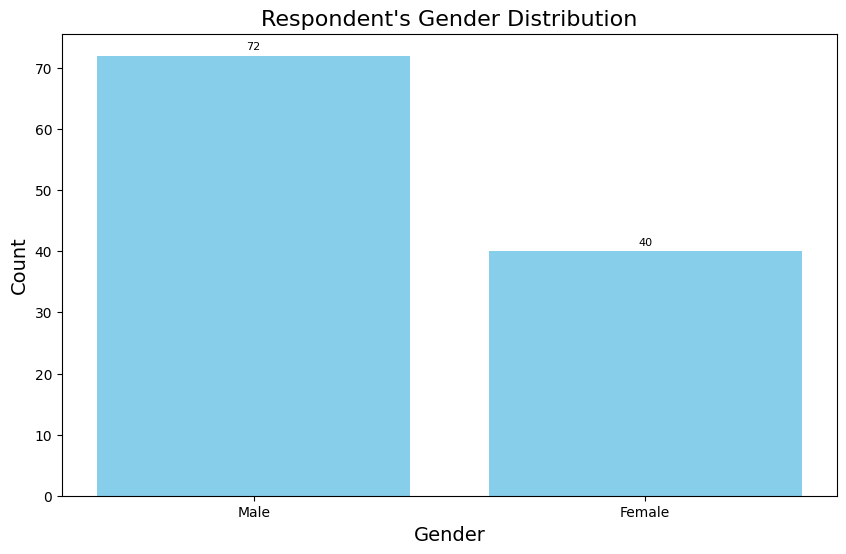

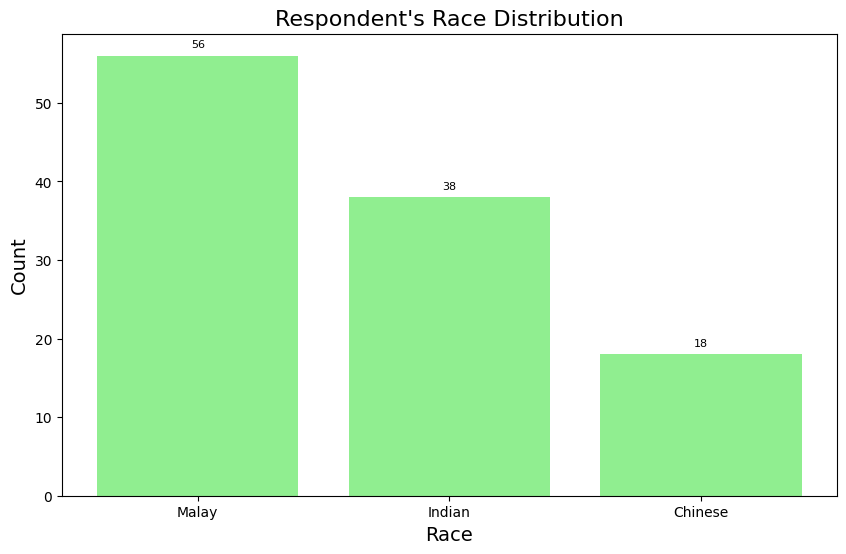

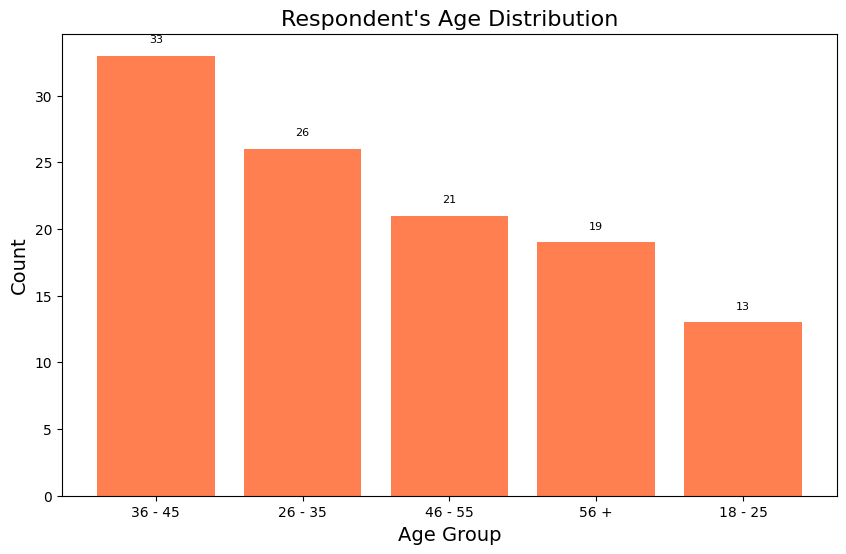

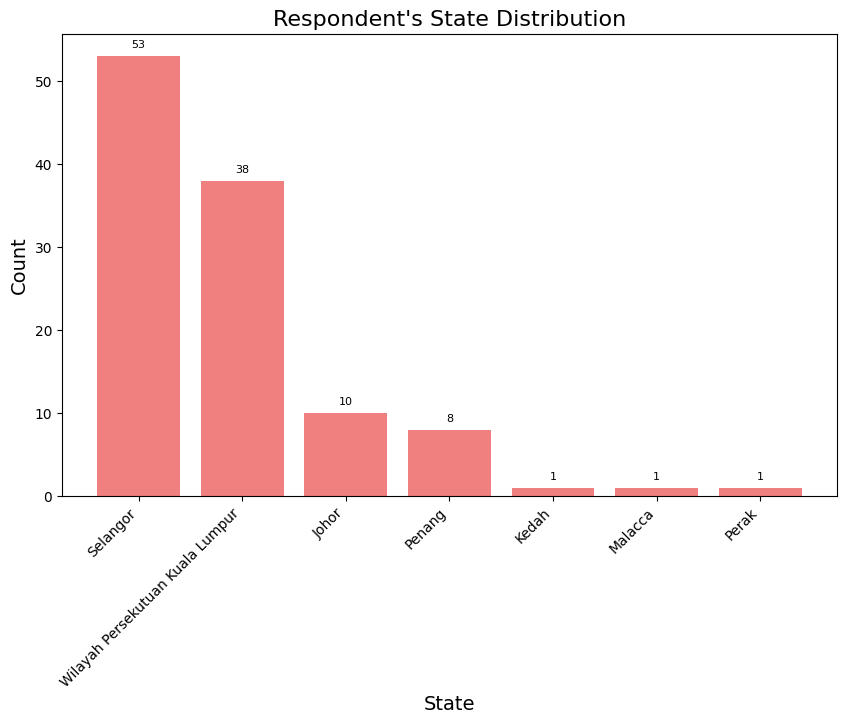

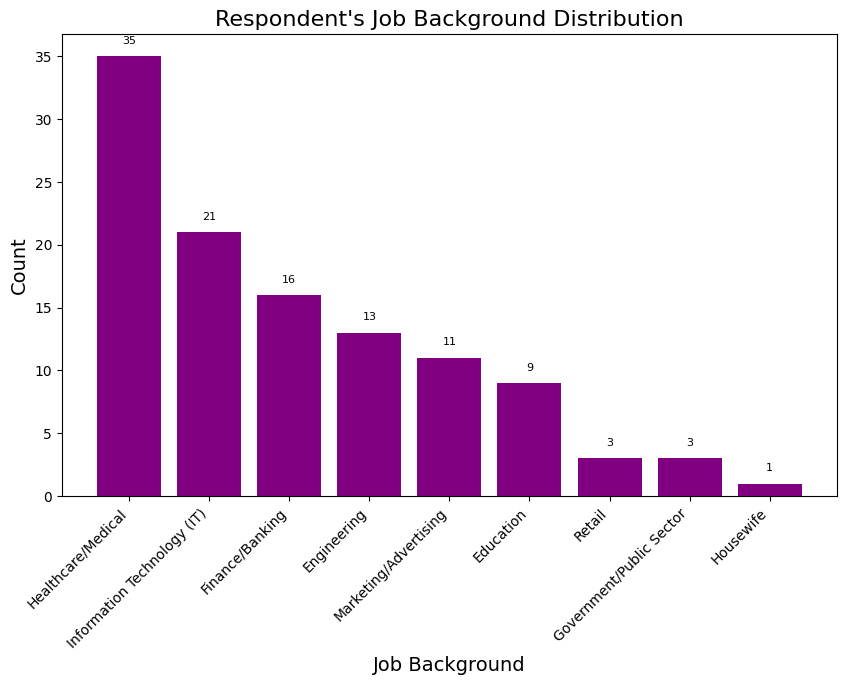

In [ ]:
import matplotlib.pyplot as plt

# Gender Distribution
plt.figure(figsize=(10, 6))
gender_counts = data['What is your gender?'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color='skyblue')
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 1, str(count), ha='center', fontsize=8)
plt.title("Respondent's Gender Distribution", fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Race Distribution
plt.figure(figsize=(10, 6))
race_counts = data['What is your race?'].value_counts()
plt.bar(race_counts.index, race_counts.values, color='lightgreen')
for i, count in enumerate(race_counts.values):
    plt.text(i, count + 1, str(count), ha='center', fontsize=8)
plt.title("Respondent's Race Distribution", fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Age Distribution
plt.figure(figsize=(10, 6))
age_counts = data['How old are you?'].value_counts()
plt.bar(age_counts.index, age_counts.values, color='coral')
for i, count in enumerate(age_counts.values):
    plt.text(i, count + 1, str(count), ha='center', fontsize=8)
plt.title("Respondent's Age Distribution", fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# State Distribution
plt.figure(figsize=(10, 6))
state_counts = data['Which state do you currently reside in?'].value_counts()
plt.bar(state_counts.index, state_counts.values, color='lightcoral')
for i, count in enumerate(state_counts.values):
    plt.text(i, count + 1, str(count), ha='center', fontsize=8)
plt.title("Respondent's State Distribution", fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

# Job Background Distribution
plt.figure(figsize=(10, 6))
job_counts = data['  What is your job background?'].value_counts()
plt.bar(job_counts.index, job_counts.values, color='purple')
for i, count in enumerate(job_counts.values):
    plt.text(i, count + 1, str(count), ha='center', fontsize=8)
plt.title("Respondent's Job Background Distribution", fontsize=16)
plt.xlabel('Job Background', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-108-dc60579c45c0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, palette=color, order=data[column].value_counts().index)


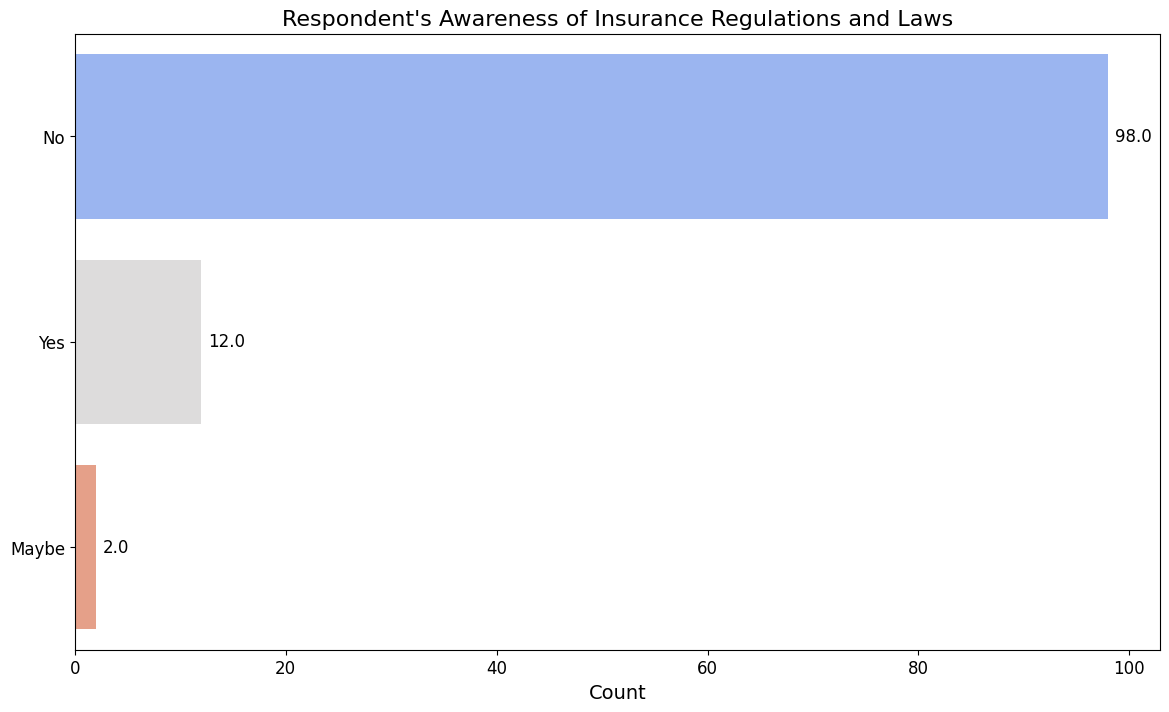

<ipython-input-108-dc60579c45c0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, palette=color, order=data[column].value_counts().index)


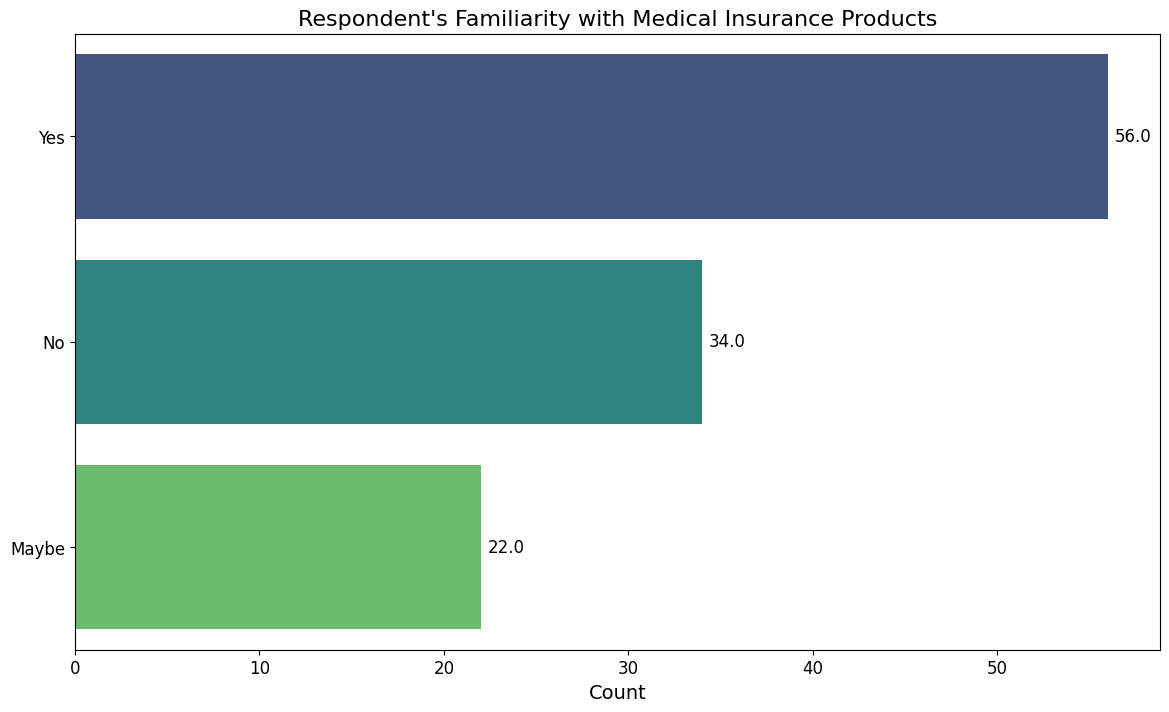

<ipython-input-108-dc60579c45c0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, palette=color, order=data[column].value_counts().index)


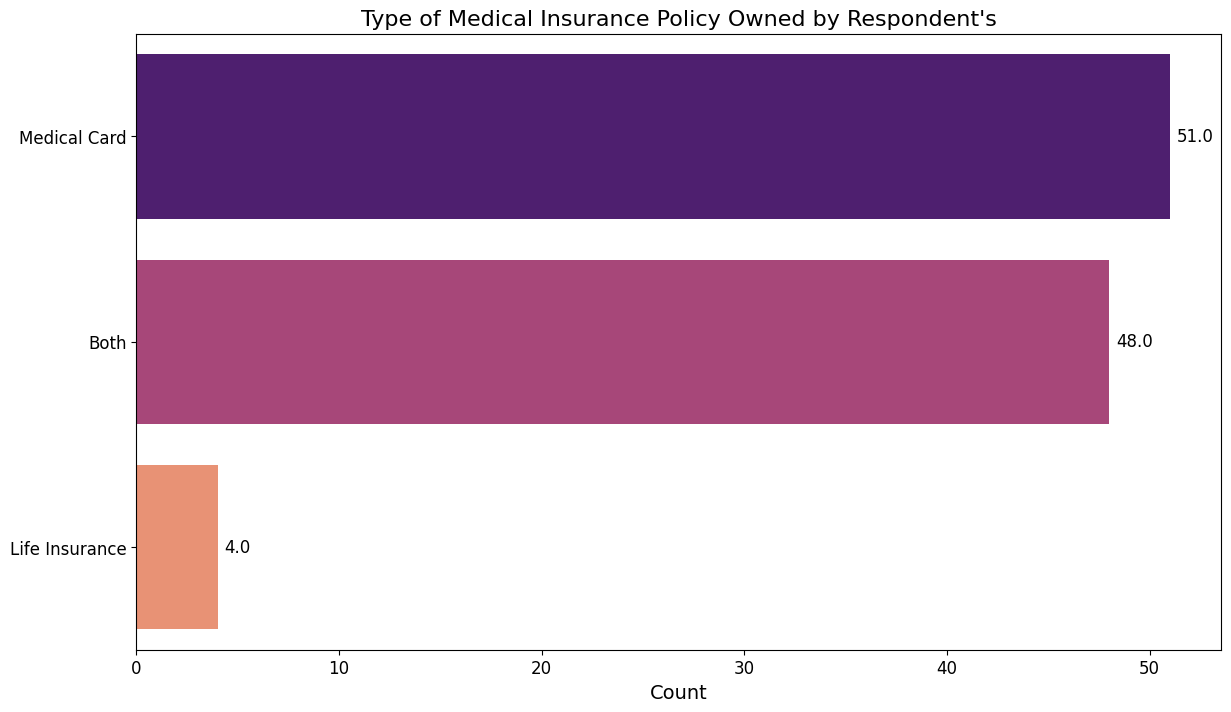

<ipython-input-108-dc60579c45c0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, palette=color, order=data[column].value_counts().index)


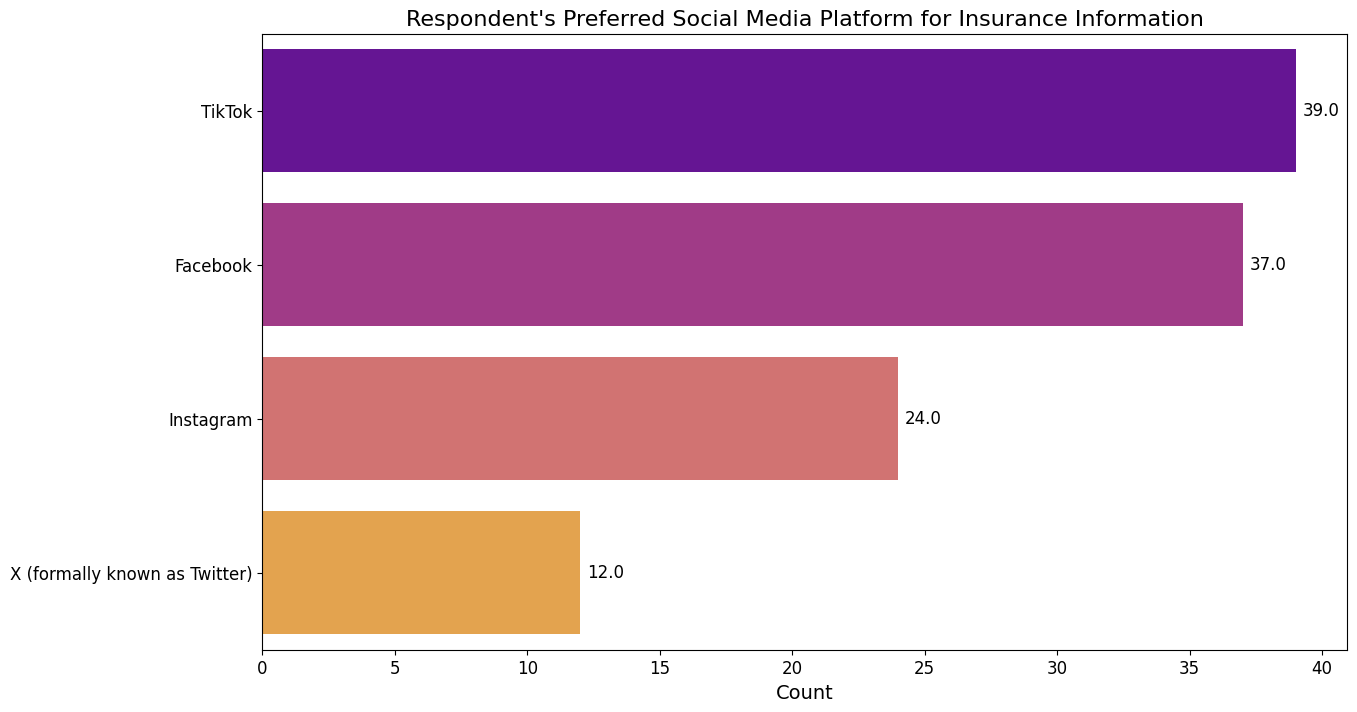

<ipython-input-108-dc60579c45c0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, palette=color, order=data[column].value_counts().index)


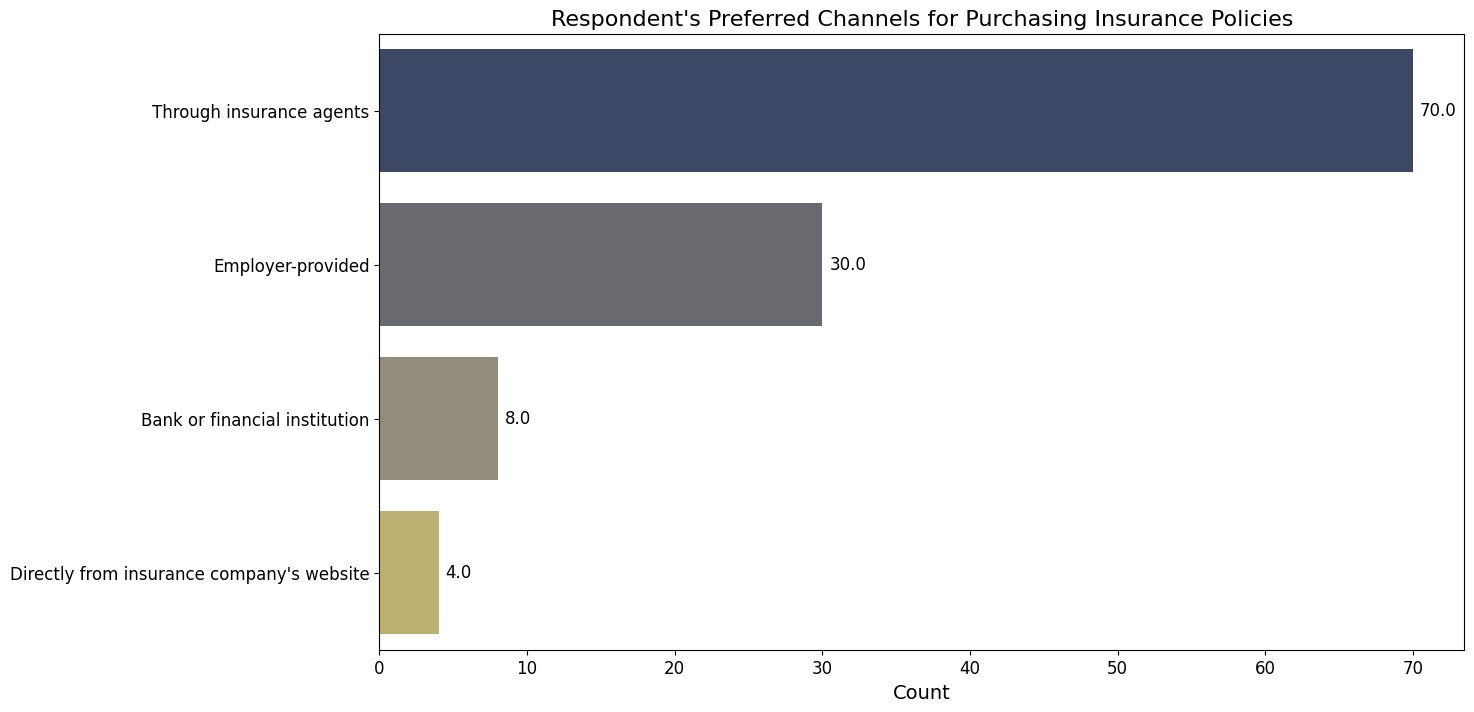

<ipython-input-108-dc60579c45c0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, palette=color, order=data[column].value_counts().index)


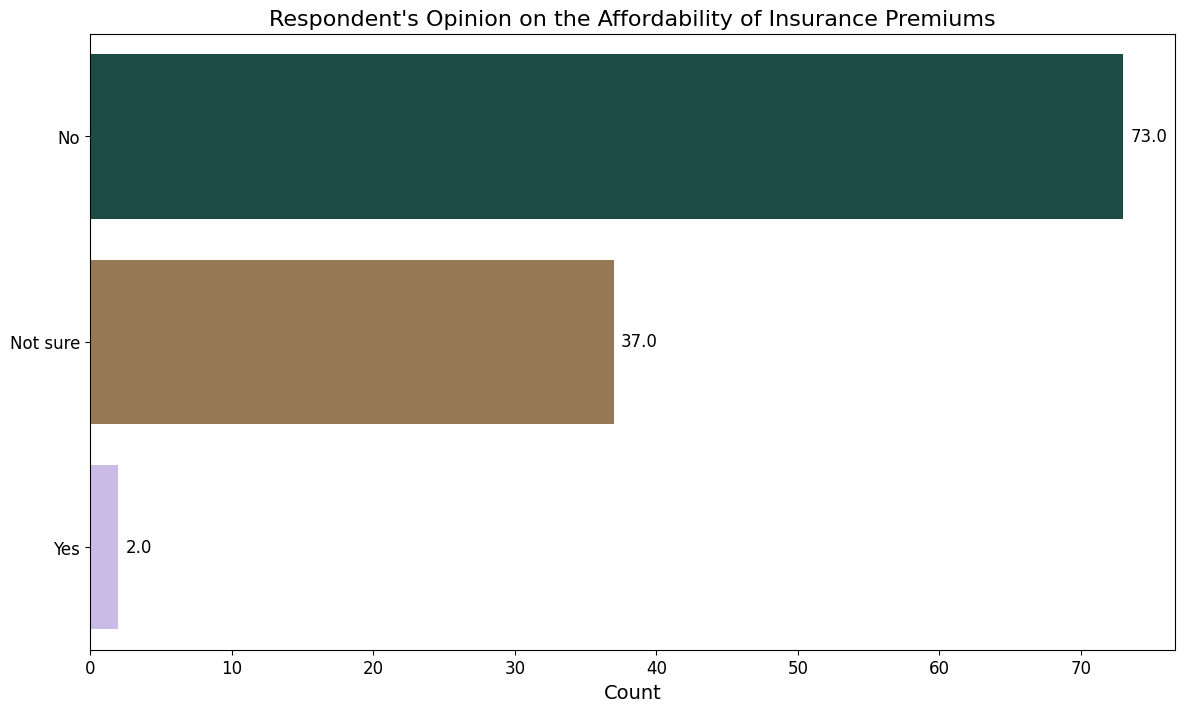

<ipython-input-108-dc60579c45c0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, palette=color, order=data[column].value_counts().index)


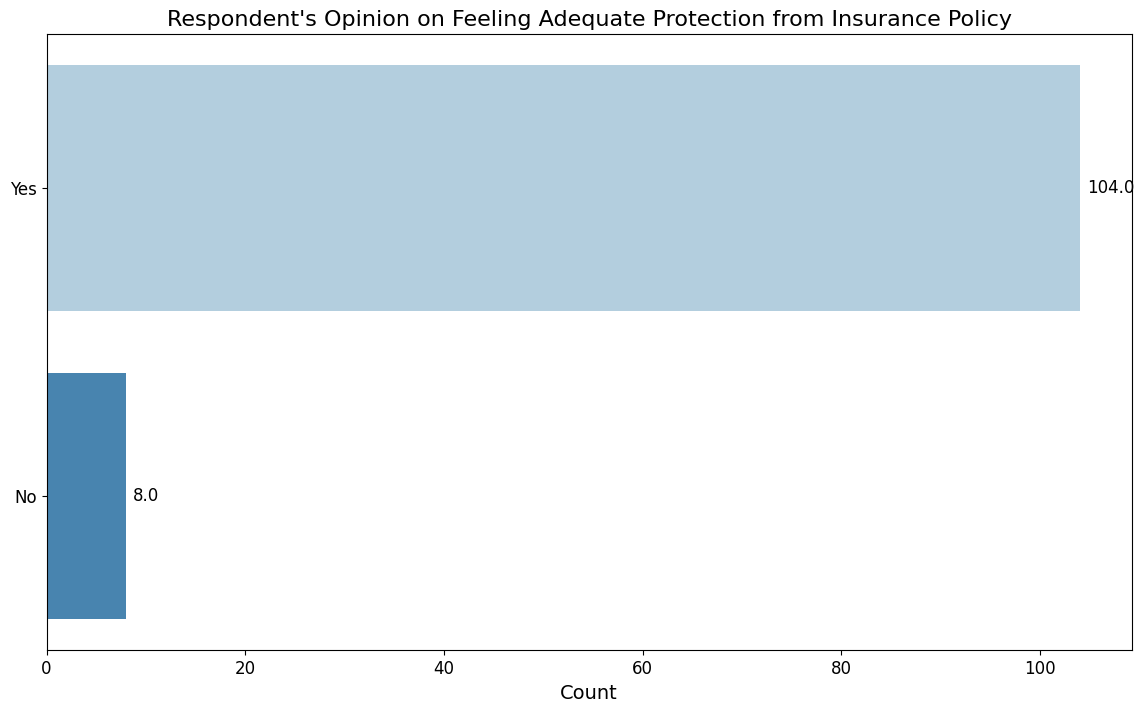

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = df

# Define a function to create bar plots with counts on the bars
def create_bar_plot(data, column, title, color):
    plt.figure(figsize=(14, 8))
    ax = sns.countplot(y=column, data=data, palette=color, order=data[column].value_counts().index)
    plt.title(title, fontsize=16)
    plt.xlabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.set_ylabel('')

    # Add counts on the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=12)
    plt.show()

# Awareness of Insurance Regulations and Laws
create_bar_plot(data, "Are you aware of Malaysia's insurance regulations and laws?",
                "Respondent's Awareness of Insurance Regulations and Laws", 'coolwarm')

# Familiarity with Medical Insurance Products
create_bar_plot(data, 'Are you familiar with the different medical insurance products available in the market?',
                "Respondent's Familiarity with Medical Insurance Products", 'viridis')

# Type of Medical Insurance Policy
create_bar_plot(data, 'What type of medical insurance policy do you currently have?',
                "Type of Medical Insurance Policy Owned by Respondent's", 'magma')

# Preferred Social Media Platform for Insurance Information
create_bar_plot(data, 'What is your preferred social media platform for receiving medical insurance-related information?',
                "Respondent's Preferred Social Media Platform for Insurance Information", 'plasma')

# Preferred Channels for Purchasing Insurance Policies
create_bar_plot(data, 'What channels do you prefer when purchasing medical insurance policies?',
                "Respondent's Preferred Channels for Purchasing Insurance Policies", 'cividis')

# Affordability of Insurance Premiums
create_bar_plot(data, 'Do you feel that insurance premiums are generally affordable?',
                "Respondent's Opinion on the Affordability of Insurance Premiums", 'cubehelix')

# Feeling of Adequate Protection by Insurance Policy
create_bar_plot(data, 'Do you feel adequately protected by your insurance policy?',
                "Respondent's Opinion on Feeling Adequate Protection from Insurance Policy", 'Blues')


In [ ]:
from collections import Counter
counts = Counter(" ".join(df['clean_text']).split()).most_common()
counts

[('agent', 44),
 ('claim', 44),
 ('insurance', 41),
 ('customer', 35),
 ('support', 31),
 ('company', 30),
 ('provide', 28),
 ('process', 26),
 ('policy', 25),
 ('make', 23),
 ('time', 16),
 ('need', 15),
 ('medical', 13),
 ('question', 10),
 ('delay', 10),
 ('handle', 10),
 ('get', 9),
 ('team', 9),
 ('information', 9),
 ('coverage', 9),
 ('receive', 9),
 ('helpful', 8),
 ('far', 8),
 ('im', 8),
 ('service', 8),
 ('issue', 8),
 ('take', 8),
 ('ensure', 8),
 ('understand', 8),
 ('felt', 8),
 ('experience', 7),
 ('call', 7),
 ('without', 7),
 ('appreciate', 7),
 ('lack', 7),
 ('ask', 6),
 ('hospital', 6),
 ('help', 6),
 ('good', 6),
 ('keep', 6),
 ('lot', 6),
 ('update', 6),
 ('status', 6),
 ('clear', 6),
 ('frustrate', 5),
 ('ok', 5),
 ('part', 5),
 ('always', 5),
 ('follow', 5),
 ('much', 5),
 ('never', 5),
 ('deal', 5),
 ('many', 5),
 ('offer', 5),
 ('address', 5),
 ('detail', 5),
 ('emergency', 5),
 ('payment', 5),
 ('difficult', 5),
 ('representative', 5),
 ('seem', 5),
 ('find', 4

In [10]:
# Import package
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from textblob import TextBlob
import seaborn as sns

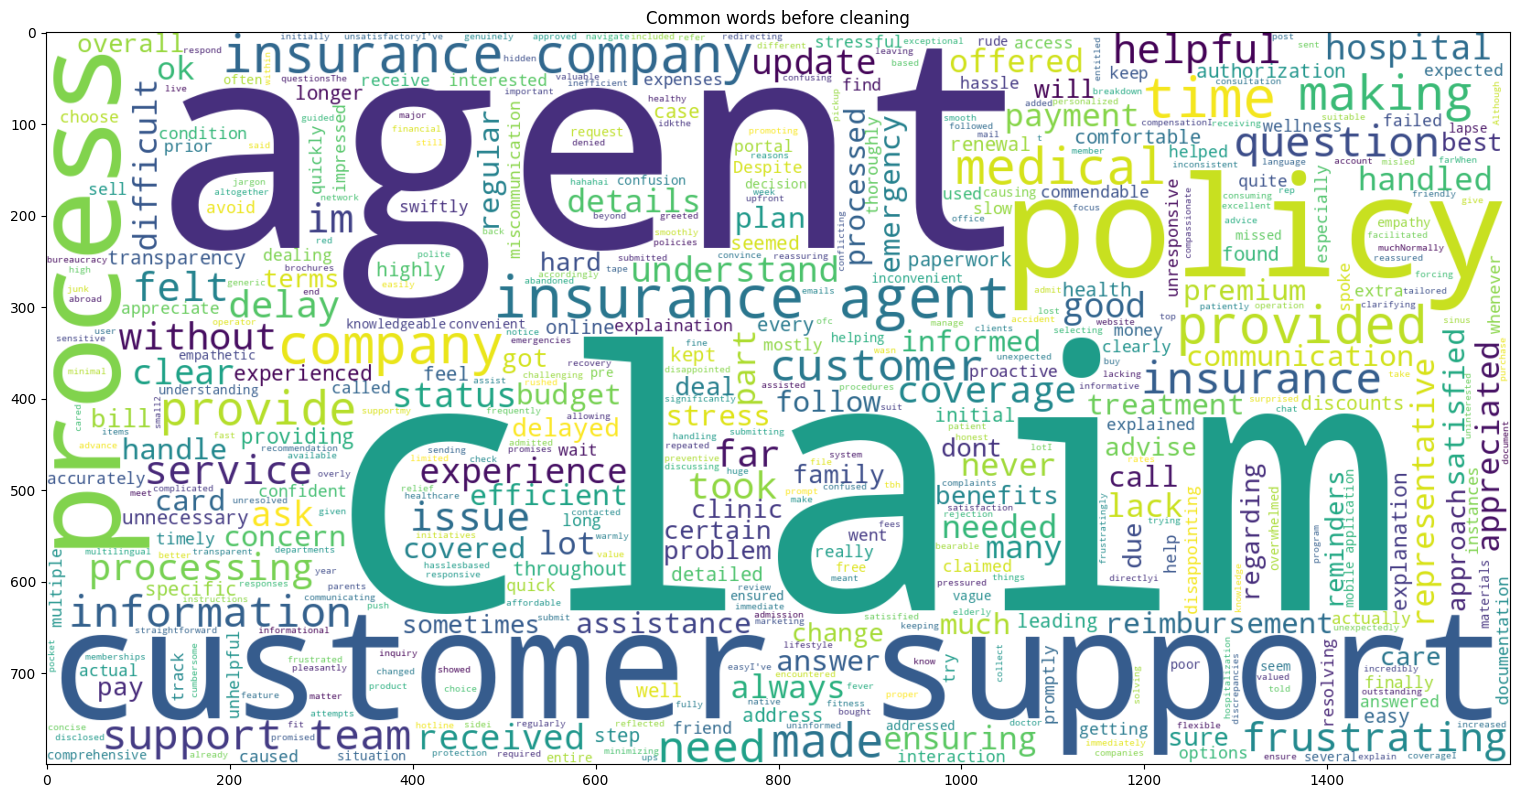

In [ ]:
wc = ''.join([text for text in df['Based on your personal experiences interacting with insurance agents or companies regarding medical insurance, please share the specific aspects of their service that you found satisfactory or unsatisfactory. This could include interactions related to claim processing, providing information on medical insurance policy, customer support, or any other relevant interactions.']])
wordcloud = WordCloud(width = 1600, height = 800, max_words=500, background_color ='white').generate(wc)
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Common words before cleaning")
plt.tight_layout(pad = 0)
plt.show()

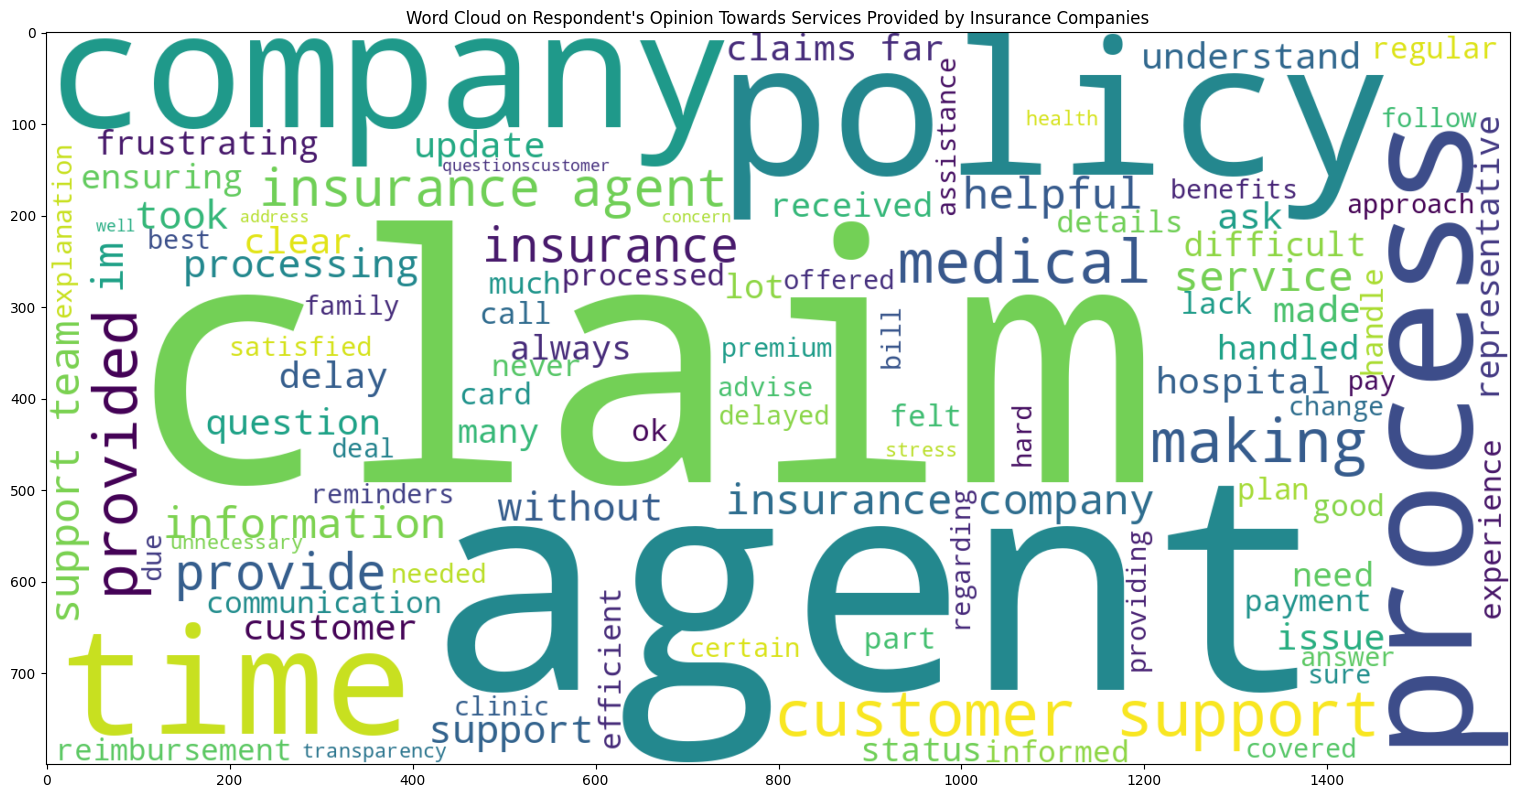

In [ ]:
wc = ''.join([text for text in df['clean_text']])
wordcloud = WordCloud(width = 1600, height = 800, max_words=100, background_color ='white').generate(wc)
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud on Respondent's Opinion Towards Services Provided by Insurance Companies")
plt.tight_layout(pad = 0)
plt.show()

## Topic Modelling using LDA

In [ ]:
!pip install --user nltk
!pip install spacy
!python -m spacy download en_core_web_sm
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import itertools
from collections import Counter
import spacy

nltk.download('stopwords')
stopwords = stopwords.words('english')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
n_iters = 200
n_documents = 15
n_topics = 5
eta = 1.5
alpha = 1.5

In [ ]:
# Specify the column to keep
column_to_keep = 'clean_text'

# Get a list of columns to drop
columns_to_drop = [col for col in df.columns if col != column_to_keep]

# Drop all columns except the specified one
df.drop(columns=columns_to_drop, inplace=True)

print(df)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words="english")

# Fit and transform the text data
dtm = cv.fit_transform(df['clean_text'])

In [ ]:
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(dtm)
# Get feature names
feature_names = cv.get_feature_names_out()
print(len(feature_names))

197


In [ ]:
len(lda.components_[0])

197

In [ ]:
n = 3
for index, topic in enumerate(lda.components_):
    print(f'The top {n} words for topic #{index + 1}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-n:]])

The top 3 words for topic #1
['company', 'agent', 'insurance']
The top 3 words for topic #2
['insurance', 'process', 'claim']
The top 3 words for topic #3
['agent', 'support', 'customer']


In [ ]:
topic_results = lda.transform(dtm)
topic_results.shape

(112, 3)

In [ ]:
topic_results[0].round(2)


array([0.03, 0.65, 0.32])

In [ ]:
df["Topic"] = topic_results.argmax(axis=1) + 1
df[['clean_text', 'Topic']].head(5)

,clean_text,Topic
0,insurance agent helpful ask question find clai...,2
1,experience insurance agent mostly ok insurance...,2
2,make claim far handle insurance agent family g...,2
3,part satisfy insurance agent always follow con...,2
4,company medical card mobile application handle...,2


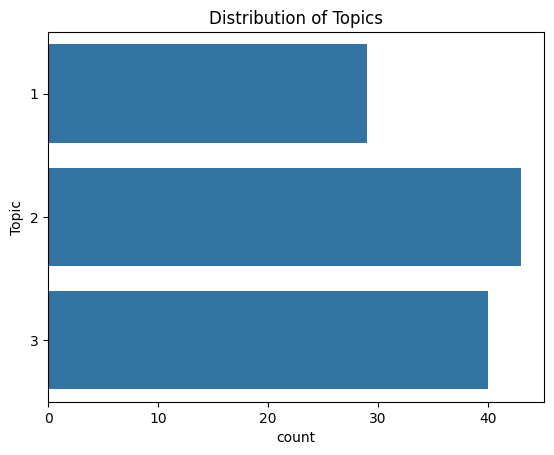

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Change the datatype as "category"
df["Topic"] = df["Topic"].astype("category")

# Visualize the Sentiment counts
sns.countplot(df["Topic"])
plt.title("Distribution of Topics")
plt.show()

In [ ]:
df['Topic'].value_counts()

Topic
2    43
3    40
1    29
Name: count, dtype: int64

## Topic Classification using Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Labelling Dataset
X = df['clean_text']
y = df['Topic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, stratify = y, random_state = 42)

In [ ]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features=5000, ngram_range=(1,2), stop_words='english')
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
# SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train_vectors_tfidf, y_train)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_smote, y_train_smote)
print("K-Nearest Neighbors:")
evaluate_model(knn, X_test_vectors_tfidf, y_test)

K-Nearest Neighbors:
              precision    recall  f1-score   support

           1       0.30      1.00      0.46         6
           2       1.00      0.22      0.36         9
           3       1.00      0.12      0.22         8

    accuracy                           0.39        23
   macro avg       0.77      0.45      0.35        23
weighted avg       0.82      0.39      0.34        23

Confusion Matrix:
 [[6 0 0]
 [7 2 0]
 [7 0 1]]
Accuracy: 0.39


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(verbose=1, solver='liblinear', random_state=0,
                             C=5, penalty='l2', max_iter=1000)
log_reg.fit(X_train_smote, y_train_smote)
print("\nLogistic Regression:")
evaluate_model(log_reg, X_test_vectors_tfidf, y_test)

[LibLinear]
Logistic Regression:
              precision    recall  f1-score   support

           1       0.75      0.50      0.60         6
           2       0.75      1.00      0.86         9
           3       1.00      0.88      0.93         8

    accuracy                           0.83        23
   macro avg       0.83      0.79      0.80        23
weighted avg       0.84      0.83      0.82        23

Confusion Matrix:
 [[3 3 0]
 [0 9 0]
 [1 0 7]]
Accuracy: 0.83


In [ ]:
# Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_smote, y_train_smote)
print("\nMultinomial Naive Bayes:")
evaluate_model(nb, X_test_vectors_tfidf, y_test)


Multinomial Naive Bayes:
              precision    recall  f1-score   support

           1       0.50      0.17      0.25         6
           2       0.64      1.00      0.78         9
           3       1.00      0.88      0.93         8

    accuracy                           0.74        23
   macro avg       0.71      0.68      0.66        23
weighted avg       0.73      0.74      0.70        23

Confusion Matrix:
 [[1 5 0]
 [0 9 0]
 [1 0 7]]
Accuracy: 0.74


In [ ]:
# Support Vector Machine
svm_model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_model.fit(X_train_smote, y_train_smote)
print("\nSupport Vector Machine:")
evaluate_model(svm_model, X_test_vectors_tfidf, y_test)


Support Vector Machine:
              precision    recall  f1-score   support

           1       0.67      0.33      0.44         6
           2       0.69      1.00      0.82         9
           3       1.00      0.88      0.93         8

    accuracy                           0.78        23
   macro avg       0.79      0.74      0.73        23
weighted avg       0.79      0.78      0.76        23

Confusion Matrix:
 [[2 4 0]
 [0 9 0]
 [1 0 7]]
Accuracy: 0.78


In [ ]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_smote, y_train_smote)
print("\nDecision Tree Classifier:")
evaluate_model(dtc, X_test_vectors_tfidf, y_test)


Decision Tree Classifier:
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         6
           2       0.89      0.89      0.89         9
           3       0.62      0.62      0.62         8

    accuracy                           0.70        23
   macro avg       0.67      0.67      0.67        23
weighted avg       0.70      0.70      0.70        23

Confusion Matrix:
 [[3 0 3]
 [1 8 0]
 [2 1 5]]
Accuracy: 0.70


## Aspect-Based Sentiment Analysis using PyABSA

In [ ]:
!pip install -U pyabsa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 23.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.

In [ ]:
from pyabsa import AspectTermExtraction as ATEPC, available_checkpoints
aspect_extractor = ATEPC.AspectExtractor('english',
                                         auto_device=True,  # False means load model on CPU
                                         cal_perplexity=True,
                                         )

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

No CUDA GPU found in your device


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

[2024-07-04 10:30:57] (2.4.1.post1) PyABSA(2.4.1.post1): If your code crashes on Colab, please use the GPU runtime. Then run "pip install pyabsa[dev] -U" and restart the kernel.
Or if it does not work, you can use v1.x versions, e.g., pip install pyabsa<2.0 -U




Try to downgrade transformers<=4.29.0.






/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=1>
  _warn(f"unclosed running multiprocessing pool {self!r}",


[2024-07-04 10:31:23] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-07-04 10:31:23] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-07-04 10:31:23] (2.4.1.post1) Downloading checkpoint:english 
[2024-07-04 10:31:23] (2.4.1.post1) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets


Find zipped checkpoint: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip, unzipping


Done.
[2024-07-04 10:31:43] (2.4.1.post1) If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA/resolve/main/checkpoints/English/ATEPC/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip 
[2024-07-04 10:31:43] (2.4.1.post1) Load aspect extractor from checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43
[2024-07-04 10:31:43] (2.4.1.post1) config: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.config
[2024-07-04 10:31:43] (2.4.1.post1) state_dict: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.state_dict
[2024-07-04 10:31:43] (2.4.1.post1) model: None
[2024-07-04 10:31:43] (2.4.1.post1) tokenizer: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.tokenizer
[2024-07-04 1

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
df_reviews=df[["clean_text"]]

df_reviews.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,clean_text
0,insurance agent helpful ask question find clai...
1,experience insurance agent mostly ok insurance...
2,make claim far handle insurance agent family g...
3,part satisfy insurance agent always follow con...
4,company medical card mobile application handle...


In [ ]:
import numpy as np
import pandas as pd
import spacy
!pip install contractions
import contractions
from pyabsa import ATEPCCheckpointManager
from pyabsa import available_checkpoints
import re
import matplotlib.pyplot as plt
from spacy.language import Language
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
# disable unnecessarylogging
import logging, sys
logging.disable(sys.maxsize)
logging.getLogger().setLevel(logging.CRITICAL)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 2.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/contractions-0.1.73.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/pyahocorasick-2.1.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/textsearch-0.0.24.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found

In [ ]:
import pandas as pd
import spacy
!pip install contractions
import contractions

nlp=spacy.load("en_core_web_sm")

def text_process(review):
    """
    - Lemmatize text
    - Expand contractions (i.e don't->do not, can't->cannot)
    """
    doc=nlp(str(review))
    lemmatized_text_arr=[token.lemma_ for token in doc]
    lemmatized_text_str =" ".join(lemmatized_text_arr)

    expanded_text = contractions.fix(lemmatized_text_str, slang=True)
    return expanded_text

In [ ]:
df_reviews['clean_text']=df_reviews['clean_text'].apply(text_process)
df_reviews.head()

,clean_text
0,insurance agent helpful ask question find clai...
1,experience insurance agent mostly ok insurance...
2,make claim far handle insurance agent family g...
3,part satisfy insurance agent always follow con...
4,company medical card mobile application handle...


In [ ]:
#add a pipe which splits at conjunctions and separators
!python -m spacy download en_core_web_md

nlp=spacy.load("en_core_web_md")
separators=[ ';', '!']

@Language.component("component")
def set_custom_boundaries(doc):
  for token in doc[:-1]:
    if token.text in separators or token.tag_ == 'CC':
      doc[token.i+1].is_sent_start = True
  return doc

nlp.add_pipe("component", before='parser')
nlp.pipe_names

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 7.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


['tok2vec',
 'tagger',
 'component',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [ ]:
#function to segment text
def segment_review(review):
  segmented_neg_reviews=[]
  doc=nlp(str(review))
  for sent in doc.sents:
    segmented_neg_reviews.append(sent.text)
  return segmented_neg_reviews

In [ ]:
# apply review segmentation to all the reviews in the dataframe

if type(df_reviews)!=pd.core.frame.DataFrame:
    df_reviews=df_reviews.to_frame()


df_reviews["segmented_reviews"]=df_reviews['clean_text'].apply(segment_review)
df_reviews.head()

,clean_text,segmented_reviews
0,insurance agent helpful ask question find clai...,[insurance agent helpful ask question find cla...
1,experience insurance agent mostly ok insurance...,[experience insurance agent mostly ok insuranc...
2,make claim far handle insurance agent family g...,[make claim far handle insurance agent family ...
3,part satisfy insurance agent always follow con...,[part satisfy insurance agent always follow co...
4,company medical card mobile application handle...,[company medical card mobile application handl...


In [ ]:
# Initialise PyABSA

checkpoint_map = available_checkpoints()
aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='english',auto_device=True)  # False means load model on CPU)

[2024-07-04 10:33:55] (2.4.1.post1) Please specify the task code, e.g. from pyabsa import TaskCodeOption
[2024-07-04 10:33:56] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-07-04 10:33:56] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-07-04 10:33:56] (2.4.1.post1) Downloading checkpoint:english 
[2024-07-04 10:33:56] (2.4.1.post1) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets
[2024-07-04 10:33:56] (2.4.1.post1) Checkpoint already downloaded, skip
[2024-07-04 10:33:56] (2.4.1.post1) Load aspect extractor from checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43
[2024-07-04 10:33:56] (2.4.1.post1) config: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.config
[2024-07-0

In [ ]:
def analysis_with_pyabsa(reviews_list):
    return aspect_extractor.extract_aspect(
        inference_source=reviews_list,
        pred_sentiment=True, print_result=False)

atepc_result=analysis_with_pyabsa(df_reviews['segmented_reviews'][0])

[2024-07-04 10:34:17] (2.4.1.post1) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


In [ ]:
print(atepc_result[0]['sentence'])
print(atepc_result[0]['aspect'])
print(atepc_result[0]['sentiment'])

insurance agent helpful ask question find claim process slow delay case frustrate handle customer support
['customer']
['Negative']


In [ ]:
print("sentence:",atepc_result[0]['sentence'])
print("aspect:",atepc_result[0]['aspect'])
print("sentiment:",atepc_result[0]['sentiment'])

sentence: insurance agent helpful ask question find claim process slow delay case frustrate handle customer support
aspect: ['customer']
sentiment: ['Negative']


In [ ]:
def get_aspect(doc):
    aspect = ''
    for token in doc:
        if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
              aspect = token.text
    return aspect

def get_descriptor(doc):
    descriptive_term = ''
    for i,token in enumerate(doc):
        if token.pos_ == 'ADJ':
            prepend = ''
            for child in token.children:
                if child.pos_ == 'ADV':
                    prepend += child.text + ' ' #Ex: not very good

            negation=""
            for t in range(i,0,-1):
                    try:
                        if doc[i-t].dep_ == 'neg':
                            negation = doc[i-t].text+' '
                    except:
                        continue
            descriptive_term = negation+ prepend + token.text
    return descriptive_term

def get_polarity(segment):
    polarity=round(TextBlob(segment).sentiment.polarity, 2)
    return polarity

def analysis_with_spacy(reviews_list):
    aspects = []
    polarities=[]
    for segment in reviews_list:
        doc = nlp(segment)

        #Use TextBlob to get sentiments
        polarity=get_polarity(segment)

        #extract aspect
        aspect=get_aspect(doc)

        #extract descriptor
        descriptive_term=get_descriptor(doc)

        if aspect!="" and descriptive_term!="":
            aspects.append({'aspect': aspect,'description': descriptive_term})
            polarities.append({'aspect': aspect,'polarity': polarity})
        else:
            aspects.append({'aspect': None,'description': None})
            polarities.append({'aspect': None,'polarity': None})

    return aspects,polarities


analysis_with_spacy(["architecture is not very good", "bad"])
# analysis_with_spacy(["food bad"])
# analysis_with_spacy(["documentary at the IOCL AUDITORIUM be the not so good part of the visit here "])
# df_reviews["segmented_reviews"][5]

([{'aspect': 'architecture', 'description': 'not very good'},
  {'aspect': None, 'description': None}],
 [{'aspect': 'architecture', 'polarity': -0.27},
  {'aspect': None, 'polarity': None}])

In [ ]:
aspect_with_description=[]
aspect_with_polarity=[]

for each_tuple in df_reviews['segmented_reviews'].apply(analysis_with_spacy):
    aspect_with_description.append(each_tuple[0])
    aspect_with_polarity.append(each_tuple[1])

In [ ]:
#add new columns with aspects
df_reviews['aspect_with_description']=aspect_with_description
df_reviews['aspect_with_polarity']=aspect_with_polarity

In [ ]:
df_reviews.head()


,clean_text,segmented_reviews,aspect_with_description,aspect_with_polarity
0,insurance agent helpful ask question find clai...,[insurance agent helpful ask question find cla...,"[{'aspect': 'agent', 'description': 'frustrate'}]","[{'aspect': 'agent', 'polarity': -0.3}]"
1,experience insurance agent mostly ok insurance...,[experience insurance agent mostly ok insuranc...,"[{'aspect': 'process', 'description': 'due'}]","[{'aspect': 'process', 'polarity': 0.15}]"
2,make claim far handle insurance agent family g...,[make claim far handle insurance agent family ...,"[{'aspect': None, 'description': None}]","[{'aspect': None, 'polarity': None}]"
3,part satisfy insurance agent always follow con...,[part satisfy insurance agent always follow co...,"[{'aspect': 'company', 'description': 'satisfi...","[{'aspect': 'company', 'polarity': 0.5}]"
4,company medical card mobile application handle...,[company medical card mobile application handl...,"[{'aspect': None, 'description': None}]","[{'aspect': None, 'polarity': None}]"


In [ ]:
df_reviews.to_csv("absa.csv", index=False, encoding="utf-8")

In [ ]:
import pandas as pd

# Load the dataframe (assuming the file is saved as 'absa.csv')
df_reviews = pd.read_csv("absa.csv")

# Explode the aspect_with_polarity column to separate each aspect and its polarity into separate rows
df_exploded = df_reviews.explode('aspect_with_polarity')

# Drop rows where 'aspect_with_polarity' is None
df_exploded = df_exploded.dropna(subset=['aspect_with_polarity'])

# Convert 'aspect_with_polarity' from string representation of dict to actual dict
df_exploded['aspect_with_polarity'] = df_exploded['aspect_with_polarity'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Explode the lists within the 'aspect_with_polarity' column
df_exploded = df_exploded.explode('aspect_with_polarity')

# Extract 'aspect' and 'polarity' into separate columns
df_exploded['aspect'] = df_exploded['aspect_with_polarity'].apply(lambda x: x['aspect'])
df_exploded['polarity'] = df_exploded['aspect_with_polarity'].apply(lambda x: x['polarity'])

# Drop the original 'aspect_with_polarity' column
df_exploded = df_exploded.drop(columns=['aspect_with_polarity'])

# Filter out rows where aspect is None
df_exploded = df_exploded.dropna(subset=['aspect'])

# Sort by polarity
df_sorted = df_exploded.sort_values(by='polarity', ascending=False)

# Get top 10 positive aspects
top_10_positive = df_sorted.head(10)

# Get top 10 negative aspects
top_10_negative = df_sorted.tail(10).sort_values(by='polarity', ascending=True)

print("Top 10 Positive Aspects:")
print(top_10_positive[['aspect', 'polarity']])

print("\nTop 10 Negative Aspects:")
print(top_10_negative[['aspect', 'polarity']])


Top 10 Positive Aspects:
        aspect  polarity
69      change      0.70
36        case      0.60
110   customer      0.55
96     support      0.50
17   admission      0.50
3      company      0.50
94    question      0.50
23      friend      0.50
50       issue      0.47
60     hotline      0.45

Top 10 Negative Aspects:
             aspect  polarity
102            time     -0.60
104       paperwork     -0.40
62      information     -0.40
51    communication     -0.33
103          stress     -0.32
67   representative     -0.30
0             agent     -0.30
7           process     -0.29
64          company     -0.25
86            claim     -0.20


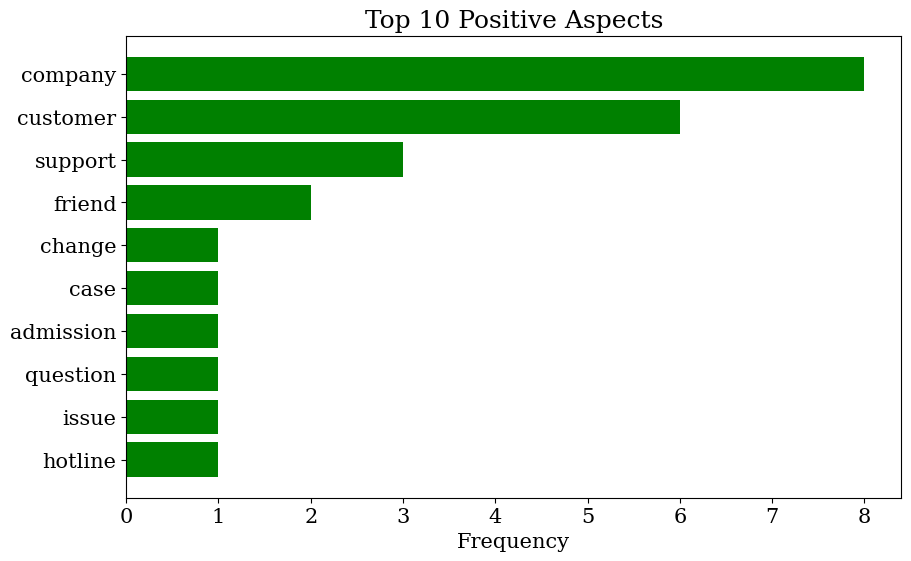

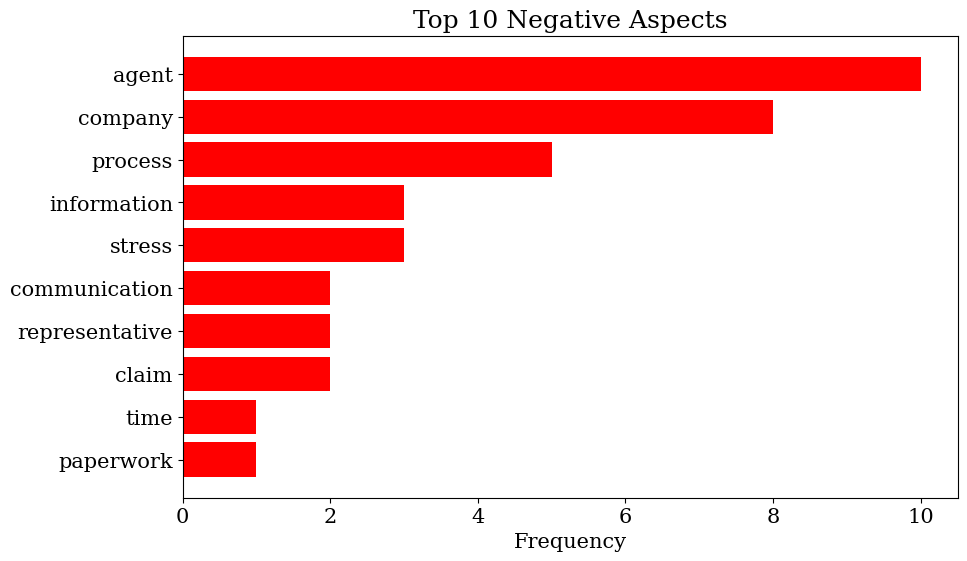

In [ ]:
# Get top 10 positive aspects
top_10_positive = df_sorted.head(10)

# Get top 10 negative aspects
top_10_negative = df_sorted.tail(10).sort_values(by='polarity', ascending=True)

# Calculate frequency of each aspect in the entire dataset
aspect_frequency = df_exploded['aspect'].value_counts().reset_index()
aspect_frequency.columns = ['aspect', 'frequency']

# Merge frequency with top positive and negative aspects
top_10_positive = top_10_positive.merge(aspect_frequency, on='aspect')
top_10_negative = top_10_negative.merge(aspect_frequency, on='aspect')

# Sort top 10 positive aspects by frequency
top_10_positive = top_10_positive.sort_values(by='frequency', ascending=False)

# Sort top 10 negative aspects by frequency
top_10_negative = top_10_negative.sort_values(by='frequency', ascending=False)

# Plot top 10 positive aspects
plt.figure(figsize=(10, 6))
plt.barh(top_10_positive['aspect'], top_10_positive['frequency'], color='green')
plt.xlabel('Frequency')
plt.title('Top 10 Positive Aspects')
plt.gca().invert_yaxis()
plt.show()

# Plot top 10 negative aspects
plt.figure(figsize=(10, 6))
plt.barh(top_10_negative['aspect'], top_10_negative['frequency'], color='red')
plt.xlabel('Frequency')
plt.title('Top 10 Negative Aspects')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df_sorted

,clean_text,segmented_reviews,aspect_with_description,aspect,polarity
69,customer service excellent need update policy ...,['customer service excellent need update polic...,"[{'aspect': 'change', 'description': 'excellen...",change,0.70
36,good experience agent review case every year p...,['good experience agent review case every year...,"[{'aspect': 'case', 'description': 'top'}]",case,0.60
110,customer support good respond promptly query p...,['customer support good respond promptly query...,"[{'aspect': 'customer', 'description': 'detail...",customer,0.55
96,post claim support outstanding help understand...,['post claim support outstanding help understa...,"[{'aspect': 'support', 'description': 'outstan...",support,0.50
17,claim process company ask many question regard...,['claim process company ask many question rega...,"[{'aspect': 'admission', 'description': 'frust...",admission,0.50
...,...,...,...,...,...
103,claim process take much long expect because un...,['claim process take much long expect because ...,"[{'aspect': 'stress', 'description': 'difficul...",stress,-0.32
51,despite repeat call customer support team fail...,['despite repeat call customer support team fa...,"[{'aspect': 'communication', 'description': 'h...",communication,-0.33
104,renewal process annnoye lot paperwork unnecess...,['renewal process annnoye lot paperwork unnece...,"[{'aspect': 'paperwork', 'description': 'unnec...",paperwork,-0.40
62,online portal difficult navigate make hard fin...,['online portal difficult navigate make hard f...,"[{'aspect': 'information', 'description': 'har...",information,-0.40


In [ ]:
df_sorted['aspect'].value_counts()

aspect
agent             10
company            8
customer           6
process            5
information        3
stress             3
policy             3
support            3
friend             2
representative     2
insurance          2
communication      2
claim              2
delay              2
document           1
instance           1
benefit            1
option             1
change             1
concern            1
tell               1
lack               1
hassle             1
situation          1
increase           1
paperwork          1
call               1
approach           1
status             1
user               1
admission          1
question           1
issue              1
hotline            1
parent             1
reminder           1
method             1
renewal            1
money              1
team               1
budget             1
detail             1
case               1
interaction        1
time               1
Name: count, dtype: int64